In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
from gtfparse import read_gtf
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import bioframe
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore, spearmanr

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## PCA

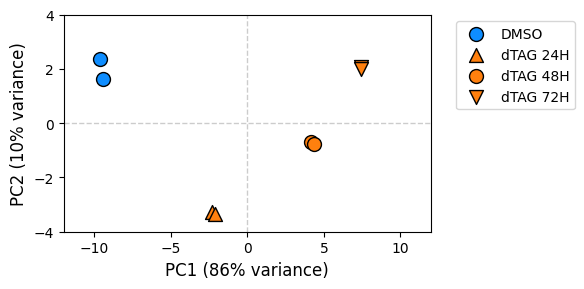

In [2]:
pca = pd.read_csv('./degs/pca_values.txt', sep = '\s+')

plt.figure(figsize = (6, 3))

plt.scatter(pca[pca['group'] == 'DMSO']['PC1'], pca[pca['group'] == 'DMSO']['PC2'], label = 'DMSO',
            edgecolor = 'k', marker = 'o', s = 100, color = '#0E8DFF')
plt.scatter(pca[pca['group'] == '24H']['PC1'], pca[pca['group'] == '24H']['PC2'], label = 'dTAG 24H',
            edgecolor = 'k', marker = '^', s = 100, color = '#FF800E')
plt.scatter(pca[pca['group'] == '48H']['PC1'], pca[pca['group'] == '48H']['PC2'], label = 'dTAG 48H',
            edgecolor = 'k', marker = 'o', s = 100, color = '#FF800E')
plt.scatter(pca[pca['group'] == '72H']['PC1'], pca[pca['group'] == '72H']['PC2'], label = 'dTAG 72H',
            edgecolor = 'k', marker = 'v', s = 100, color = '#FF800E')
plt.legend(bbox_to_anchor = (1.05, 1))
plt.axhline(0, color = '#CCCCCC', lw = 1, ls = '--')
plt.axvline(0, color = '#CCCCCC', lw = 1, ls = '--')
plt.xlabel('PC1 (86% variance)', fontsize = 12)
plt.ylabel('PC2 (10% variance)', fontsize = 12)
plt.xlim((-12, 12))
plt.ylim((-4, 4))

plt.tight_layout()
plt.show()

## DEGs

In [3]:
# Read GTF with gene annotation
genes = read_gtf('../gencode.vM25.annotation.gtf')
genes = genes[genes['feature'] == 'gene']
genes = genes[['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_type', 'gene_name']]
genes.head()

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


,seqname,start,end,strand,gene_id,gene_type,gene_name
0,chr1,3073253,3074322,+,ENSMUSG00000102693.1,TEC,4933401J01Rik
3,chr1,3102016,3102125,+,ENSMUSG00000064842.1,snRNA,Gm26206
6,chr1,3205901,3671498,-,ENSMUSG00000051951.5,protein_coding,Xkr4
24,chr1,3252757,3253236,+,ENSMUSG00000102851.1,processed_pseudogene,Gm18956
27,chr1,3365731,3368549,-,ENSMUSG00000103377.1,TEC,Gm37180


### dTAG 24H vs DMSO

In [4]:
degs_24H = pd.read_csv('./degs/degs_24H_DESeq.csv', sep = '\s+', header = 0)
degs_24H['gene_id'] = degs_24H.index
degs_24H.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ENSMUSG00000025902.13,10.570478,2.251215,0.964426,1.727715,0.084039,1.0,ENSMUSG00000025902.13
ENSMUSG00000103922.1,144.628181,0.092944,0.194073,0.000000,1.000000,1.0,ENSMUSG00000103922.1
ENSMUSG00000033845.13,1803.061788,0.064591,0.061217,0.000000,1.000000,1.0,ENSMUSG00000033845.13
ENSMUSG00000102275.1,10.207686,-0.606876,0.708288,-0.030939,0.975318,1.0,ENSMUSG00000102275.1
ENSMUSG00000025903.14,1484.345591,-0.466163,0.067949,0.000000,1.000000,1.0,ENSMUSG00000025903.14


In [5]:
degs_24H = degs_24H.merge(genes, on = 'gene_id')

columns_to_save = ['seqname', 'start', 'end', 'gene_name', 'gene_id', 'strand', 'gene_type', 'log2FoldChange', 'baseMean', 'pvalue', 'padj']
degs_24H = degs_24H[columns_to_save]

degs_24H.sort_values('log2FoldChange').head()

,seqname,start,end,gene_name,gene_id,strand,gene_type,log2FoldChange,baseMean,pvalue,padj
7710,chr9,121981606,121997110,Pomgnt2,ENSMUSG00000066235.7,-,protein_coding,-6.202873,13.365637,2.038340e-04,6.779280e-03
7261,chr9,57544256,57552763,Mpi,ENSMUSG00000032306.14,-,protein_coding,-5.834544,214.593589,5.344775e-66,6.868036e-63
5235,chr7,24301704,24316666,Zfp94,ENSMUSG00000074282.10,-,protein_coding,-4.829468,23.768211,3.078979e-08,1.713440e-06
14015,chrX,139684996,139753405,Tbc1d8b,ENSMUSG00000042473.8,+,protein_coding,-4.812548,13.709420,2.016708e-05,7.896446e-04
6029,chr7,127989708,127993867,Pycard,ENSMUSG00000030793.4,-,protein_coding,-4.665757,130.800796,5.934789e-43,3.355529e-40


In [6]:
degs_24H_up = degs_24H[(degs_24H['padj'] < 0.01) & (degs_24H['log2FoldChange'] > 0)]
degs_24H_down = degs_24H[(degs_24H['padj'] < 0.01) & (degs_24H['log2FoldChange'] < 0)]
degs_24H_stable = degs_24H[~degs_24H['gene_id'].isin([x for x in degs_24H['gene_id'].values \
                                                      if x in degs_24H_down['gene_id'].values or x in degs_24H_up['gene_id'].values])]

print('Up-regulated:', len(degs_24H_up))
print('Down-regulated:', len(degs_24H_down))
print('No change:', len(degs_24H_stable))
print('Low expression:', len(genes) - len(degs_24H))

Up-regulated: 102
Down-regulated: 338
No change: 13695
Low expression: 41266


In [7]:
degs_24H_down.to_csv('./degs/degs_24H_down.bed', header = 1, index = 0, sep = '\t')
degs_24H_up.to_csv('./degs/degs_24H_up.bed', header = 1, index = 0, sep = '\t')
degs_24H_stable.to_csv('./degs/degs_24H_stable.bed', header = 1, index = 0, sep = '\t')
degs_24H[['gene_name', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_24H.ranked.rnk', sep = '\t', header = 0, index = 0)
degs_24H[['gene_id', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_24H.ranked.ensid.rnk', sep = '\t', header = 0, index = 0)

### dTAG 48H vs DMSO

In [8]:
degs_48H = pd.read_csv('./degs/degs_48H_DESeq.csv', sep = '\s+', header = 0)
degs_48H['gene_id'] = degs_48H.index
degs_48H.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ENSMUSG00000025902.13,10.570478,2.822347,0.943966,2.370197,0.017779,0.118762,ENSMUSG00000025902.13
ENSMUSG00000103922.1,144.628181,0.035564,0.194517,0.000000,1.000000,1.000000,ENSMUSG00000103922.1
ENSMUSG00000033845.13,1803.061788,-0.209038,0.061997,0.000000,1.000000,1.000000,ENSMUSG00000033845.13
ENSMUSG00000102275.1,10.207686,-0.398834,0.695380,0.000000,1.000000,1.000000,ENSMUSG00000102275.1
ENSMUSG00000025903.14,1484.345591,-0.844610,0.069395,-3.741594,0.000183,0.002026,ENSMUSG00000025903.14


In [9]:
degs_48H = degs_48H.merge(genes, on = 'gene_id')

columns_to_save = ['seqname', 'start', 'end', 'gene_name', 'gene_id', 'strand', 'gene_type', 'log2FoldChange', 'baseMean', 'pvalue', 'padj']
degs_48H = degs_48H[columns_to_save]

degs_48H.sort_values('log2FoldChange').head()

,seqname,start,end,gene_name,gene_id,strand,gene_type,log2FoldChange,baseMean,pvalue,padj
7261,chr9,57544256,57552763,Mpi,ENSMUSG00000032306.14,-,protein_coding,-6.578201,214.593589,4.375436e-57,1.344495e-54
14015,chrX,139684996,139753405,Tbc1d8b,ENSMUSG00000042473.8,+,protein_coding,-6.408343,13.709420,1.275388e-04,1.473574e-03
867,chr2,22622205,22693874,Gad2,ENSMUSG00000026787.3,+,protein_coding,-5.670821,11.715449,9.705916e-04,9.189091e-03
11709,chr16,16365184,16366157,Gm7765,ENSMUSG00000098037.1,-,processed_pseudogene,-5.300291,9.474254,2.562075e-03,2.151808e-02
6029,chr7,127989708,127993867,Pycard,ENSMUSG00000030793.4,-,protein_coding,-4.854330,130.800796,1.610645e-43,2.647264e-41


In [10]:
degs_48H_up = degs_48H[(degs_48H['padj'] < 0.01) & (degs_48H['log2FoldChange'] > 0)]
degs_48H_down = degs_48H[(degs_48H['padj'] < 0.01) & (degs_48H['log2FoldChange'] < 0)]
degs_48H_stable = degs_48H[~degs_48H['gene_id'].isin([x for x in degs_48H['gene_id'].values \
                                                      if x in degs_48H_down['gene_id'].values or x in degs_48H_up['gene_id'].values])]

print('Up-regulated:', len(degs_48H_up))
print('Down-regulated:', len(degs_48H_down))
print('No change:', len(degs_48H_stable))
print('Low expression:', len(genes) - len(degs_48H))

Up-regulated: 777
Down-regulated: 737
No change: 12621
Low expression: 41266


In [11]:
degs_48H_down.to_csv('./degs/degs_48H_down.bed', header = 1, index = 0, sep = '\t')
degs_48H_up.to_csv('./degs/degs_48H_up.bed', header = 1, index = 0, sep = '\t')
degs_48H_stable.to_csv('./degs/degs_48H_stable.bed', header = 1, index = 0, sep = '\t')
degs_48H[['gene_name', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_48H.ranked.rnk', sep = '\t', header = 0, index = 0)
degs_48H[['gene_id', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_48H.ranked.ensid.rnk', sep = '\t', header = 0, index = 0)

### dTAG 72H vs DMSO

In [12]:
degs_72H = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/degs/degs_72H_DESeq.csv', sep = '\s+', header = 0)
degs_72H['gene_id'] = degs_72H.index
degs_72H.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id
ENSMUSG00000025902.13,10.570478,3.125110,0.934345,2.718641,0.006555,0.035190,ENSMUSG00000025902.13
ENSMUSG00000103922.1,144.628181,0.133394,0.192176,0.000000,1.000000,1.000000,ENSMUSG00000103922.1
ENSMUSG00000033845.13,1803.061788,-0.607888,0.063161,-0.362978,0.716621,1.000000,ENSMUSG00000033845.13
ENSMUSG00000102275.1,10.207686,-0.682176,0.706011,-0.137694,0.890482,1.000000,ENSMUSG00000102275.1
ENSMUSG00000025903.14,1484.345591,-0.820687,0.068907,-3.420915,0.000624,0.004155,ENSMUSG00000025903.14


In [13]:
degs_72H = degs_72H.merge(genes, on = 'gene_id')

columns_to_save = ['seqname', 'start', 'end', 'gene_name', 'gene_id', 'strand', 'gene_type', 'log2FoldChange', 'baseMean', 'pvalue', 'padj']
degs_72H = degs_72H[columns_to_save]

degs_72H.sort_values('log2FoldChange').head()

,seqname,start,end,gene_name,gene_id,strand,gene_type,log2FoldChange,baseMean,pvalue,padj
6752,chr8,105973097,105985879,Gm45752,ENSMUSG00000110457.2,+,transcribed_unprocessed_pseudogene,-7.360591,14.378288,9.926255e-06,8.994078e-05
20,chr1,9908638,9942085,Mcmdc2,ENSMUSG00000046101.16,+,protein_coding,-6.694404,18.116824,3.047499e-05,2.594963e-04
7261,chr9,57544256,57552763,Mpi,ENSMUSG00000032306.14,-,protein_coding,-6.603061,214.593589,3.086355e-60,4.641024e-58
5480,chr7,44198191,44202352,Klk1b3,ENSMUSG00000066515.3,+,protein_coding,-6.234309,21.302743,1.025581e-04,7.934637e-04
6805,chr8,110919922,110972480,St3gal2,ENSMUSG00000031749.12,+,protein_coding,-5.920636,302.081401,3.237949e-80,8.029545e-78


In [14]:
degs_72H_up = degs_72H[(degs_72H['padj'] < 0.01) & (degs_72H['log2FoldChange'] > 0)]
degs_72H_down = degs_72H[(degs_72H['padj'] < 0.01) & (degs_72H['log2FoldChange'] < 0)]
degs_72H_stable = degs_72H[~degs_72H['gene_id'].isin([x for x in degs_72H['gene_id'].values \
                                                      if x in degs_72H_down['gene_id'].values or x in degs_72H_up['gene_id'].values])]

print('Up-regulated:', len(degs_72H_up))
print('Down-regulated:', len(degs_72H_down))
print('No change:', len(degs_72H_stable))
print('Low expression:', len(genes) - len(degs_72H))

Up-regulated: 1122
Down-regulated: 1168
No change: 11845
Low expression: 41266


In [15]:
degs_72H_down.to_csv('./degs/degs_72H_down.bed', header = 1, index = 0, sep = '\t')
degs_72H_up.to_csv('./degs/degs_72H_up.bed', header = 1, index = 0, sep = '\t')
degs_72H_stable.to_csv('./degs/degs_72H_stable.bed', header = 1, index = 0, sep = '\t')
degs_72H[['gene_name', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_72H.ranked.rnk', sep = '\t', header = 0, index = 0)
degs_72H[['gene_id', 'log2FoldChange']].sort_values(['log2FoldChange']).to_csv('./gsea/genes_72H.ranked.ensid.rnk', sep = '\t', header = 0, index = 0)

## Volcano plots

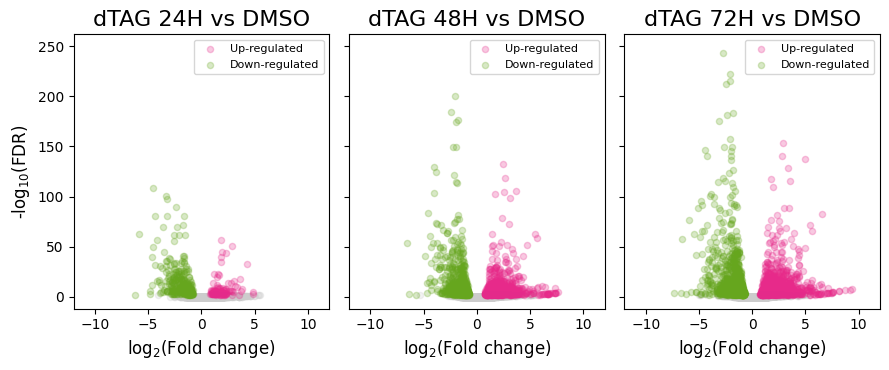

In [16]:
plt.figure(figsize = (9, 3.8))

plt.subplot(131)
plt.title('dTAG 24H vs DMSO', fontsize = 16)
plt.scatter(degs_24H_stable['log2FoldChange'], -np.log10(degs_24H_stable['padj']), 
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(degs_24H_up['log2FoldChange'], -np.log10(degs_24H_up['padj']), 
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.25, s = 20)
plt.scatter(degs_24H_down['log2FoldChange'], -np.log10(degs_24H_down['padj']), 
            color = '#66A61E', label = 'Down-regulated', alpha = 0.25, s = 20)

plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.ylabel('-log$_{10}$(FDR)', fontsize = 12)
plt.xlim((-12, 12))
plt.ylim((-12, 262))
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(132)
plt.title('dTAG 48H vs DMSO', fontsize = 16)
plt.scatter(degs_48H_stable['log2FoldChange'], -np.log10(degs_48H_stable['padj']), 
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(degs_48H_up['log2FoldChange'], -np.log10(degs_48H_up['padj']), 
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.25, s = 20)
plt.scatter(degs_48H_down['log2FoldChange'], -np.log10(degs_48H_down['padj']), 
            color = '#66A61E', label = 'Down-regulated', alpha = 0.25, s = 20)

plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-12, 12))
plt.ylim((-12, 262))
plt.yticks([0, 50, 100, 150, 200, 250], [])
plt.legend(loc = 'upper right', fontsize = 8)

plt.subplot(133)
plt.title('dTAG 72H vs DMSO', fontsize = 16)
plt.scatter(degs_72H_stable['log2FoldChange'], -np.log10(degs_72H_stable['padj']), 
            color = '#CCCCCC', label = '_nolegend_', alpha = 0.25, s = 20)
plt.scatter(degs_72H_up['log2FoldChange'], -np.log10(degs_72H_up['padj']), 
            color = '#E72A8A', label = 'Up-regulated', alpha = 0.25, s = 20)
plt.scatter(degs_72H_down['log2FoldChange'], -np.log10(degs_72H_down['padj']), 
            color = '#66A61E', label = 'Down-regulated', alpha = 0.25, s = 20)

plt.xlabel('log$_2$(Fold change)', fontsize = 12)
plt.xlim((-12, 12))
plt.ylim((-12, 262))
plt.yticks([0, 50, 100, 150, 200, 250], [])
plt.legend(loc = 'upper right', fontsize = 8)

plt.tight_layout()
plt.show()

## Sankey plot

In [44]:
degs_sankey = list(degs_24H_up['gene_id'].values) + list(degs_24H_down['gene_id'].values) + list(degs_48H_up['gene_id'].values) + list(degs_48H_down['gene_id'].values) + list(degs_72H_up['gene_id'].values) + list(degs_72H_down['gene_id'].values)
degs_sankey = np.unique(degs_sankey)
degs_sankey_ids = [x.split('.')[0].split('ENSMUSG')[-1].lstrip('0') for x in degs_sankey]

time_24H = ['24H']*len(degs_sankey)
category_24H = []
for deg in degs_sankey:
    if deg in degs_24H_up['gene_id'].values:
        category_24H.append('Up')
    elif deg in degs_24H_down['gene_id'].values:
        category_24H.append('Down')
    else:
        category_24H.append('n.s.')
        
time_48H = ['48H']*len(degs_sankey)
category_48H = []
for deg in degs_sankey:
    if deg in degs_48H_up['gene_id'].values:
        category_48H.append('Up')
    elif deg in degs_48H_down['gene_id'].values:
        category_48H.append('Down')
    else:
        category_48H.append('n.s.')

time_72H = ['72H']*len(degs_sankey)
category_72H = []
for deg in degs_sankey:
    if deg in degs_72H_up['gene_id'].values:
        category_72H.append('Up')
    elif deg in degs_72H_down['gene_id'].values:
        category_72H.append('Down')
    else:
        category_72H.append('n.s.')
        
        
degs_sankey_df = pd.DataFrame({'Timepoint': time_24H+time_48H+time_72H, 'id': degs_sankey_ids+degs_sankey_ids+degs_sankey_ids, 'cat': category_24H+category_48H+category_72H})
degs_sankey_df.to_csv('/DATA/users/magnitov/znf143/rnaseq/degs/df_for_sankey.tsv', header = 1, index = 0, sep = '\t')

## DEGs overlap with ChIP-seq

In [21]:
zfp143_targets = pd.read_csv('../chipseq/annotations/ZFP143_target_genes.ensembl_id.txt', header = None)
zfp143_targets = list(zfp143_targets[0].values)

In [31]:
fractions_targets, numbers_targets = [], []
for gene_set in [degs_24H_down, degs_48H_down, degs_72H_down, 
                 degs_24H_up, degs_48H_up, degs_72H_up,
                 degs_24H_stable, degs_48H_stable, degs_72H_stable]:
    number_of_targets = len([x for x in gene_set['gene_id'].values if x in zfp143_targets])
    numbers_targets.append(number_of_targets)
    fractions_targets.append(round(number_of_targets / len(gene_set), 4))

In [32]:
print('24H DOWN: %s out of %s (%s perc)' % (numbers_targets[0], len(degs_24H_down), fractions_targets[0]*100))
print('48H DOWN: %s out of %s (%s perc)' % (numbers_targets[1], len(degs_48H_down), fractions_targets[1]*100))
print('72H DOWN: %s out of %s (%s perc)' % (numbers_targets[2], len(degs_72H_down), fractions_targets[2]*100))
print()
print('24H UP: %s out of %s (%s perc)' % (numbers_targets[3], len(degs_24H_up), fractions_targets[3]*100))
print('48H UP: %s out of %s (%s perc)' % (numbers_targets[4], len(degs_48H_up), fractions_targets[4]*100))
print('72H UP: %s out of %s (%s perc)' % (numbers_targets[5], len(degs_72H_up), fractions_targets[5]*100))
print()
print('24H STABLE: %s out of %s (%s perc)' % (numbers_targets[6], len(degs_24H_stable), fractions_targets[6]*100))
print('48H STABLE: %s out of %s (%s perc)' % (numbers_targets[7], len(degs_48H_stable), fractions_targets[7]*100))
print('72H STABLE: %s out of %s (%s perc)' % (numbers_targets[8], len(degs_72H_stable), fractions_targets[8]*100))

24H DOWN: 278 out of 338 (82.25 perc)
48H DOWN: 366 out of 737 (49.66 perc)
72H DOWN: 409 out of 1168 (35.02 perc)

24H UP: 15 out of 102 (14.71 perc)
48H UP: 47 out of 777 (6.05 perc)
72H UP: 63 out of 1122 (5.609999999999999 perc)

24H STABLE: 1724 out of 13695 (12.590000000000002 perc)
48H STABLE: 1604 out of 12621 (12.709999999999999 perc)
72H STABLE: 1545 out of 11845 (13.04 perc)


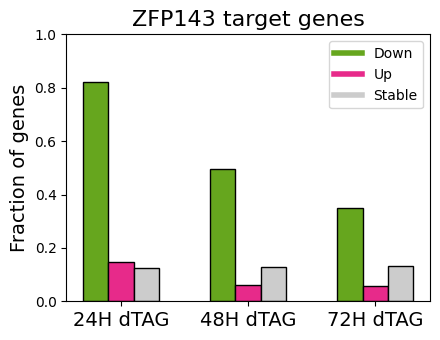

In [33]:
plt.figure(figsize = (4.5, 3.5))
plt.title('ZFP143 target genes', fontsize = 16)
plt.bar(list(np.arange(0, 6, 2)-0.4) + list(np.arange(0, 6, 2)) + list(np.arange(0, 6, 2)+0.4), fractions_targets, 
        width = 0.4, edgecolor = 'k', color = ['#66A61E', '#66A61E', '#66A61E', '#E72A8A', '#E72A8A', '#E72A8A', '#CCCCCC', '#CCCCCC', '#CCCCCC'])
plt.xticks([0, 2, 4], ['24H dTAG', '48H dTAG', '72H dTAG'], fontsize = 14)
plt.ylabel('Fraction of genes', fontsize = 14)
plt.ylim((0, 1))

custom_lines = [Line2D([0], [0], color='#66A61E', lw=4),
                Line2D([0], [0], color='#E72A8A', lw=4),
                Line2D([0], [0], color='#CCCCCC', lw=4)]
plt.legend(custom_lines, ['Down', 'Up', 'Stable'])

plt.tight_layout()
plt.show()

## DEGs overlap with RNA-seq

In [34]:
ttseq_2H_down = pd.read_csv('../ttseq/degs/degs_2H_down.bed', sep = '\t')
ttseq_6H_down = pd.read_csv('../ttseq/degs/degs_6H_down.bed', sep = '\t')
ttseq_24H_down = pd.read_csv('../ttseq/degs/degs_24H_down.bed', sep = '\t')

ttseq_2H_up = pd.read_csv('../ttseq/degs/degs_2H_up.bed', sep = '\t')
ttseq_6H_up = pd.read_csv('../ttseq/degs/degs_6H_up.bed', sep = '\t')
ttseq_24H_up = pd.read_csv('../ttseq/degs/degs_24H_up.bed', sep = '\t')

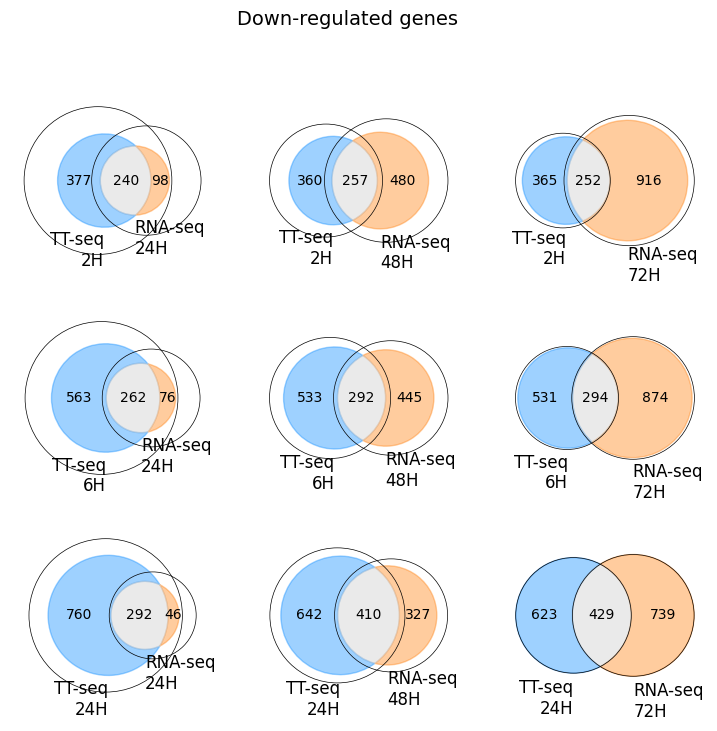

In [35]:
set_sizes = [len(np.unique(list(ttseq_2H_down['gene_id'].values) + list(degs_24H_down['gene_id'].values))),
             len(np.unique(list(ttseq_2H_down['gene_id'].values) + list(degs_48H_down['gene_id'].values))),
             len(np.unique(list(ttseq_2H_down['gene_id'].values) + list(degs_72H_down['gene_id'].values))),
             len(np.unique(list(ttseq_6H_down['gene_id'].values) + list(degs_24H_down['gene_id'].values))),
             len(np.unique(list(ttseq_6H_down['gene_id'].values) + list(degs_48H_down['gene_id'].values))),
             len(np.unique(list(ttseq_6H_down['gene_id'].values) + list(degs_72H_down['gene_id'].values))),
             len(np.unique(list(ttseq_24H_down['gene_id'].values) + list(degs_24H_down['gene_id'].values))),
             len(np.unique(list(ttseq_24H_down['gene_id'].values) + list(degs_48H_down['gene_id'].values))),
             len(np.unique(list(ttseq_24H_down['gene_id'].values) + list(degs_72H_down['gene_id'].values)))]

set_sizes_scale = [x/np.max(set_sizes) for x in set_sizes]

plt.figure(figsize = (9, 8))

plt.suptitle('Down-regulated genes', fontsize = 14)

plt.subplot(331)
v = venn2([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[0])
venn2_circles([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(332)
v = venn2([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[1])
venn2_circles([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(333)
v = venn2([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[2])
venn2_circles([set(list(ttseq_2H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(334)
v = venn2([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[3])
venn2_circles([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(335)
v = venn2([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[4])
venn2_circles([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(336)
v = venn2([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[5])
venn2_circles([set(list(ttseq_6H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(337)
v = venn2([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[6])
venn2_circles([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_24H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(338)
v = venn2([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[7])
venn2_circles([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_48H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(339)
v = venn2([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[8])
venn2_circles([set(list(ttseq_24H_down['gene_id'].values)), set(list(degs_72H_down['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.show()

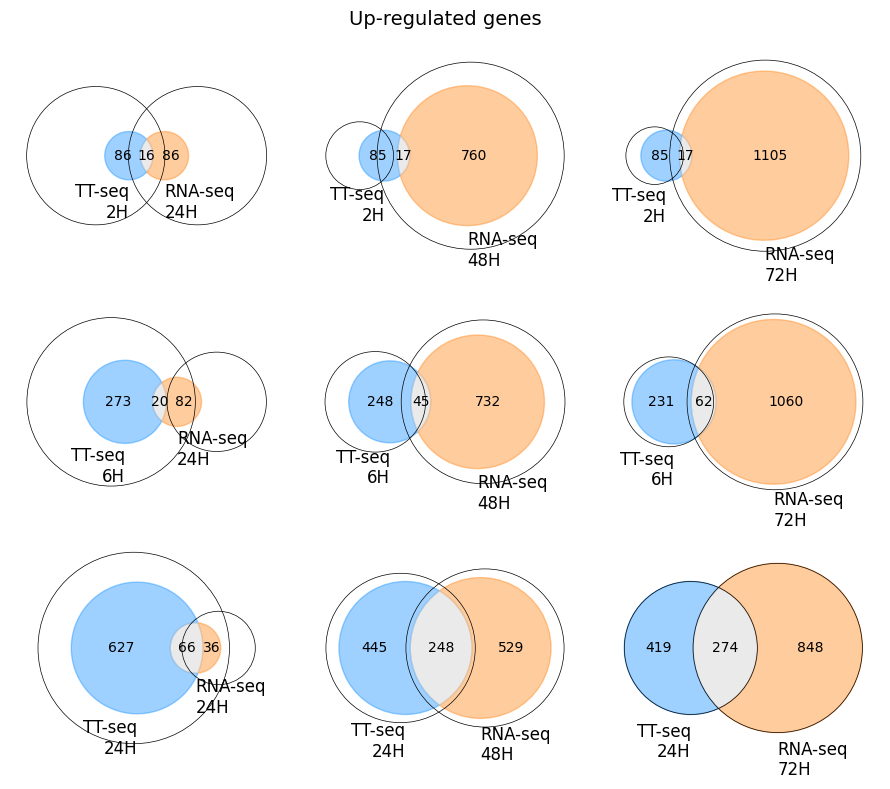

In [36]:
set_sizes = [len(np.unique(list(ttseq_2H_up['gene_id'].values) + list(degs_24H_up['gene_id'].values))),
             len(np.unique(list(ttseq_2H_up['gene_id'].values) + list(degs_48H_up['gene_id'].values))),
             len(np.unique(list(ttseq_2H_up['gene_id'].values) + list(degs_72H_up['gene_id'].values))),
             len(np.unique(list(ttseq_6H_up['gene_id'].values) + list(degs_24H_up['gene_id'].values))),
             len(np.unique(list(ttseq_6H_up['gene_id'].values) + list(degs_48H_up['gene_id'].values))),
             len(np.unique(list(ttseq_6H_up['gene_id'].values) + list(degs_72H_up['gene_id'].values))),
             len(np.unique(list(ttseq_24H_up['gene_id'].values) + list(degs_24H_up['gene_id'].values))),
             len(np.unique(list(ttseq_24H_up['gene_id'].values) + list(degs_48H_up['gene_id'].values))),
             len(np.unique(list(ttseq_24H_up['gene_id'].values) + list(degs_72H_up['gene_id'].values)))]

set_sizes_scale = [x/np.max(set_sizes) for x in set_sizes]

plt.figure(figsize = (9, 8))

plt.suptitle('Up-regulated genes', fontsize = 14)

plt.subplot(331)
v = venn2([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[0])
venn2_circles([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(332)
v = venn2([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[1])
venn2_circles([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(333)
v = venn2([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], 
          ('TT-seq\n2H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[2])
venn2_circles([set(list(ttseq_2H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(334)
v = venn2([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[3])
venn2_circles([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(335)
v = venn2([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[4])
venn2_circles([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(336)
v = venn2([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], 
          ('TT-seq\n6H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[5])
venn2_circles([set(list(ttseq_6H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(337)
v = venn2([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n24H'), normalize_to = set_sizes_scale[6])
venn2_circles([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_24H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(338)
v = venn2([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n48H'), normalize_to = set_sizes_scale[7])
venn2_circles([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_48H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.subplot(339)
v = venn2([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], 
          ('TT-seq\n24H', 'RNA-seq\n72H'), normalize_to = set_sizes_scale[8])
venn2_circles([set(list(ttseq_24H_up['gene_id'].values)), set(list(degs_72H_up['gene_id'].values))], lw = 0.5)
v.get_patch_by_id('10').set_color('#0E8DFF')
v.get_patch_by_id('01').set_color('#FF800E')
v.get_patch_by_id('11').set_color('#CCCCCC')

plt.tight_layout()
plt.show()